<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Linear Regression</p> 

In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm #model making is done using this module having instance sm
import matplotlib.pyplot as plt
%matplotlib inline

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold">
Read in the data</p>

In [7]:
wine=pd.read_csv('wine.csv')  #to read a file and store the data
wine
#AGST=Average Growing Season temperature

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805
5,1959,8.0757,485,17.4833,187,24,46128.638
6,1960,6.5188,763,16.4167,290,23,46583.995
7,1961,8.4937,830,17.3333,38,22,47128.005
8,1962,7.3880,697,16.3000,52,21,48088.673
9,1963,6.7127,608,15.7167,155,20,48798.990


In [9]:
wine.describe() #describe is function of data frame!


,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


Text(0.5,1,'One variable Model')

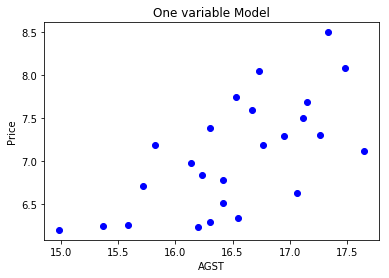

In [10]:
plt.plot(wine["AGST"],wine["Price"],'bo')
plt.xlabel("AGST") #at x-axis
plt.ylabel("Price")

#AGST increases such that price increases
plt.title("One variable Model")

Text(0.5,1,'One variable Model')

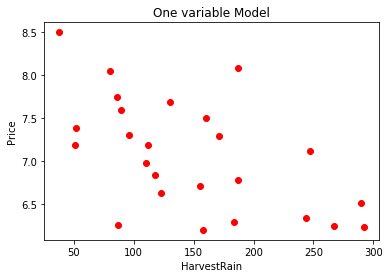

In [13]:
plt.plot(wine["HarvestRain"],wine["Price"],'ro')
plt.xlabel("HarvestRain") #at x-axis
plt.ylabel("Price") #at y-axis
plt.title("One variable Model")

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold">Linear Regression Model(one variable)</p>

In [19]:
model1=sm.ols('Price~AGST',data=wine).fit()
model1.fittedvalues
#in output there are fitted value

0     7.452957
1     7.209462
2     7.474106
3     6.828406
4     7.008391
5     7.685783
6     7.008391
7     7.590519
8     6.934276
9     6.563825
10    7.548222
11    6.341542
12    7.082443
13    6.891915
14    6.870766
15    7.093049
16    7.167165
17    7.230674
18    6.098047
19    7.421203
20    6.934276
21    7.347087
22    7.791653
23    6.479104
24    6.627335
dtype: float64

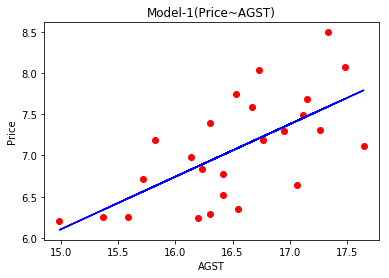

In [26]:
plt.plot(wine['AGST'],wine['Price'],'ro')
plt.plot(wine['AGST'],model1.fittedvalues,'b')
plt.xlabel('AGST')
plt.ylabel('Price')
plt.title('Model-1(Price~AGST)')
plt.show()

In [27]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.71
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           0.000335
Time:                        12:11:18   Log-Likelihood:                -17.070
No. Observations:                  25   AIC:                             38.14
Df Residuals:                      23   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4178      2.494     -1.371      0.184      -8.576       1.740
AGST           0.6351      0.151      4.208      0.000       0.323       0.947
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.790
Skew:                           0.055   Prob(JB):                        0.674
Kurtosis:                       2.136   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model1.params #gives y intercept

Intercept   -3.417761
AGST         0.635094
dtype: float64

In [31]:
model1.resid #residual:difference y-y^

0     0.042043
1     0.829838
2     0.211694
3     0.156094
4    -0.231191
5     0.389917
6    -0.489591
7     0.903181
8     0.453724
9     0.148875
10   -0.238822
11   -0.089742
12    0.661857
13   -0.052115
14   -0.627266
15   -0.747149
16    0.421135
17   -0.037274
18    0.106853
19   -0.784503
20   -0.640176
21   -0.055087
22   -0.670553
23   -0.220404
24    0.558665
dtype: float64

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold">Sum Of SQUARED ERROR(SSE)</p>

In [32]:
SSE=sum(model1.resid**2)
SSE

5.734875147020117

In [86]:
RMSE=np.sqrt(SSE/len(wine))
RMSE

0.05744741888760584

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold">(SST)</p>

In [ ]:
SST=

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold">Linear Regression(two Variable)</p>

In [90]:
model2=sm.ols('Price~AGST+HarvestRain',data=wine).fit()

In [38]:
model2.summary() #gives R sqaured value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     26.59
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           1.35e-06
Time:                        12:21:06   Log-Likelihood:                -8.8461
No. Observations:                  25   AIC:                             23.69
Df Residuals:                      22   BIC:                             27.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.2027      1.854     -1.188      0.248      -6.048       1.643
AGST            0.6026      0.111      5.415      0.000       0.372       0.833
HarvestRain    -0.0046      0.001     -4.525      0.000      -0.007      -0.002
==============================================================================
Omnibus:                        1.897   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.096
Skew:                          -0.511   Prob(JB):                        0.578
Kurtosis:                       3.080   Cond. No.                     4.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
SSE=sum(model2.resid**2)
SSE

2.970373340173545

In [45]:
SST=sum((wine['Price']-np.mean(wine['Price']))**2)
SST

10.1506377256

In [44]:
model2.resid

0     0.114050
1     0.523789
2     0.147681
3    -0.032340
4    -0.058527
5     0.597222
6     0.153789
7     0.424676
8     0.005641
9     0.152563
10   -0.454426
11    0.414425
12    0.376732
13   -0.200741
14    0.018216
15   -0.309663
16    0.154053
17   -0.195997
18    0.100432
19   -0.883212
20   -0.485012
21    0.061776
22   -0.183631
23   -0.531812
24    0.090316
dtype: float64

In [40]:
RMSE=np.sqrt(SSE/len(wine))
RMSE

0.3446954215056269

In [46]:
model3=sm.ols('Price~AGST+HarvestRain+WinterRain',data=wine).fit()

In [47]:
model3.summary() #it gives best prediction value because r-squared going closer to the 1 which means accuracy increases

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     21.42
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           1.36e-06
Time:                        12:27:39   Log-Likelihood:                -6.6922
No. Observations:                  25   AIC:                             21.38
Df Residuals:                      21   BIC:                             26.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.3016      2.037     -2.112      0.047      -8.537      -0.066
AGST            0.6810      0.112      6.097      0.000       0.449       0.913
HarvestRain    -0.0039      0.001     -3.953      0.001      -0.006      -0.002
WinterRain      0.0012      0.001      1.987      0.060   -5.47e-05       0.002
==============================================================================
Omnibus:                        0.621   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.419
Skew:                          -0.303   Prob(JB):                        0.811
Kurtosis:                       2.810   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold">Linear Regression(All Variales)#Best</p>

In [48]:
model4=sm.ols('Price~AGST+HarvestRain+WinterRain+Age+FrancePop',data=wine).fit()
#FrancePOP is france population

In [49]:
model4.summary()
#P>|t|:used for hypothetical testing

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           1.04e-06
Time:                        12:32:13   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4504     10.189     -0.044      0.965     -21.776      20.875
AGST            0.6012      0.103      5.836      0.000       0.386       0.817
HarvestRain    -0.0040      0.001     -4.523      0.000      -0.006      -0.002
WinterRain      0.0010      0.001      1.963      0.064   -6.89e-05       0.002
Age             0.0006      0.079      0.007      0.994      -0.165       0.166
FrancePop   -4.953e-05      0.000     -0.297      0.770      -0.000       0.000
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   2.792
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.026
Skew:                          -0.005   Prob(JB):                        0.599
Kurtosis:                       2.008   Cond. No.                     8.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
'''Age and FrancePop is incoefficiant variable having no effect on prediction
But we cannot remove them directly and check correlation between them'''

'Age and FrancePop is incoefficiant variable having no effect on prediction\nBut we cannot remove them directly and check correlation between them'

In [51]:
wine.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


In [52]:
#negative correlation means inverse relation which is between year and age
#both age and francepop has strong negative correlation
#now we will remove one of them by checking R-Squared values

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold">Remove FrancePop</p>

In [85]:
model5=sm.ols('Price~AGST+HarvestRain+WinterRain+Age',data=wine).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           2.04e-07
Time:                        13:24:25   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.4300      1.766     -1.942      0.066      -7.114       0.254
AGST            0.6072      0.099      6.152      0.000       0.401       0.813
HarvestRain    -0.0040      0.001     -4.652      0.000      -0.006      -0.002
WinterRain      0.0011      0.001      2.120      0.047    1.73e-05       0.002
Age             0.0239      0.008      2.956      0.008       0.007       0.041
==============================================================================
Omnibus:                        1.814   Durbin-Watson:                   2.797
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.041
Skew:                           0.034   Prob(JB):                        0.594
Kurtosis:                       2.003   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold">Remove Age</p>

In [56]:
model6=sm.ols('Price~AGST+HarvestRain+WinterRain+FrancePop',data=wine).fit()

In [57]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     24.30
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           1.95e-07
Time:                        12:57:28   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             14.21
Df Residuals:                      20   BIC:                             20.30
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3768      2.180     -0.173      0.865      -4.925       4.171
AGST            0.6011      0.099      6.073      0.000       0.395       0.808
HarvestRain    -0.0040      0.001     -4.646      0.000      -0.006      -0.002
WinterRain      0.0010      0.001      2.055      0.053   -1.58e-05       0.002
FrancePop   -5.075e-05    1.7e-05     -2.978      0.007   -8.63e-05   -1.52e-05
==============================================================================
Omnibus:                        1.763   Durbin-Watson:                   2.791
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.024
Skew:                          -0.006   Prob(JB):                        0.599
Kurtosis:                       2.009   Cond. No.                     1.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold">Testing data</p>

In [60]:
wineTest=pd.read_csv("wine_test.csv")
wineTest

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236


In [77]:
predictTest=model4.predict(wineTest)
predictTest

0    6.820462
1    6.751144
dtype: float64

In [63]:
wineTest['Price']

0    6.9541
1    6.4979
Name: Price, dtype: float64

In [78]:
predictTest=model5.predict(wineTest)
predictTest

0    6.821819
1    6.752865
dtype: float64

In [79]:
wineTest['Price']

0    6.9541
1    6.4979
Name: Price, dtype: float64

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold">Compute R-Squared</p>

In [80]:

SSE=sum((wineTest['Price']-predictTest)**2)
SSE

0.08250514842120132

In [84]:
R_sqrd=1-SSE/SST
R_sqrd

0.7551244524864911